<a href="https://colab.research.google.com/github/KImre28/ls_data/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of all gathered data

## Importing packages

In [2]:
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats
import matplotlib.dates as md
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
import seaborn as sn
from functools import reduce

## Importing all used dataframes
- 1 hour resolution neutron monitor data for 1/12/1981 - 10/7/2023
- 1 minute resolution neutron monitor data for 1/1/2001 - 10/7/2023
- 1 hour resolution F10.7 and DST data from OMNI data set for 1/12/1981 - 10/7/2023

In [3]:
# 'nm' stands for 'Neutron Monitor'
# 'h' stands for 'hourly averages'
# 'm' stands for 'minutely averages'
# 'df' stands for 'dataframe'
nm_hdf = pd.read_parquet('/content/sample_data/LMKS_NM_1981-2023_hour.parquet.gzip')
nm_mdf = pd.read_parquet('/content/sample_data/LMKS_NM_2001-2023_min.parquet.gzip')
omni = pd.read_parquet('/content/sample_data/f10-dst_1981-2023_hour.parquet.gzip')

### Creating a unified dataframe for 1 hour resolution data

In [4]:
# 'mdf' stands for 'main dataframe'
# 'h' stands for hourly averages
mdfh = pd.concat([nm_hdf, omni], axis=1)
mdfh

,H_COR,w,F10_INDEX,DST
1981-12-01 00:00:00,87.2680,,230.699997,4
1981-12-01 01:00:00,86.9240,,230.699997,5
1981-12-01 02:00:00,86.8670,,230.699997,6
1981-12-01 03:00:00,86.4080,,230.699997,7
1981-12-01 04:00:00,86.5230,,230.699997,8
...,...,...,...,...
2023-07-10 19:00:00,92.4196,,196.899994,-3
2023-07-10 20:00:00,92.4196,,196.899994,2
2023-07-10 21:00:00,92.4196,,196.899994,5
2023-07-10 22:00:00,92.4196,,196.899994,6


### A quick view of data in main dataframe

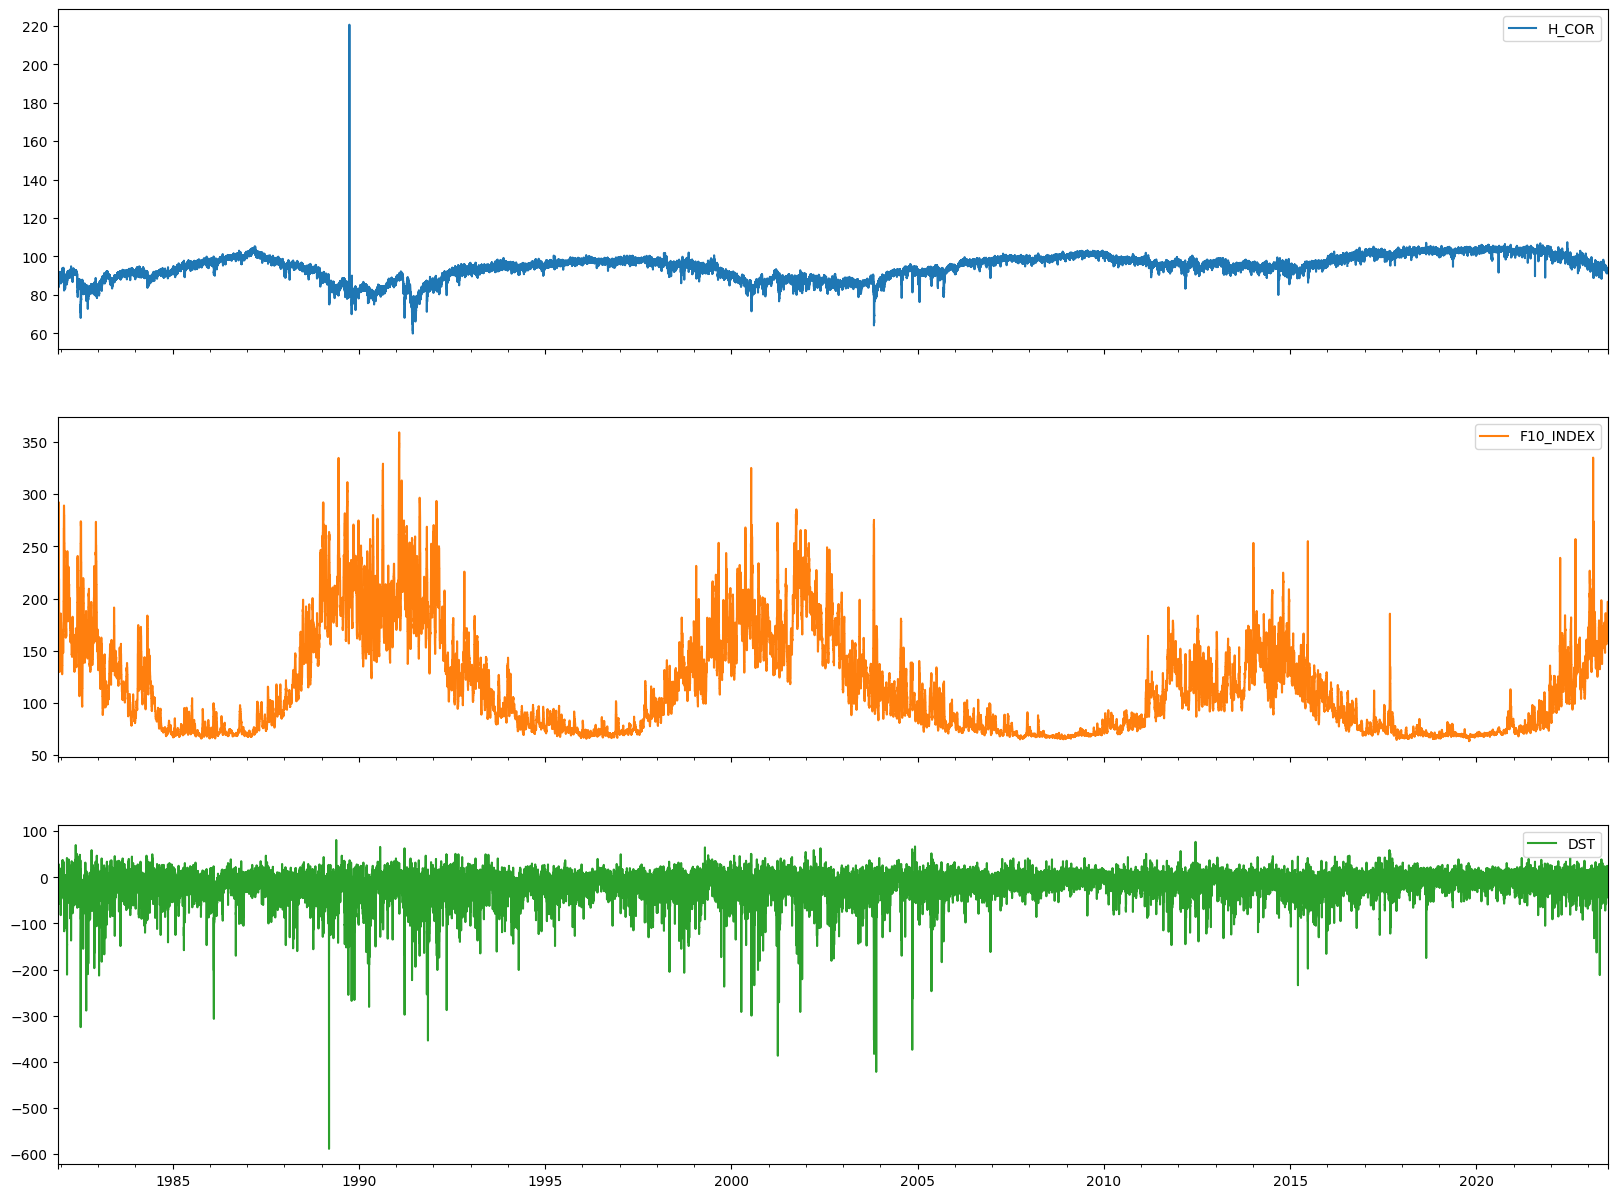

In [5]:
mdfh.plot(subplots=True, figsize=(20,15))
#nm_mdf.plot(subplots=True, figsize=(20,5))
plt.show()

In [ ]:
# provide overall characteristics of the 1 hour resolution NM data frame
mdfh.describe()

,H_COR,F10_INDEX,DST
count,364704.000000,364416.000000,364728.00000
mean,94.506592,114.837822,-14.53995
std,6.068182,47.853996,22.10731
min,59.889000,63.400002,-589.00000
25%,90.878769,74.800003,-23.00000
50%,95.576000,99.099998,-10.00000
75%,98.739000,142.199997,-1.00000
max,220.656000,359.200012,81.00000


In [ ]:
# provide overall characteristics of the 1 minute resolution NM data frame
#nm_mdf.describe()

# Searching for correlations in data

In [ ]:
mdfh.corr(method='pearson')

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\1218159765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mdfh.corr(method='pearson')


,H_COR,F10_INDEX,DST
H_COR,1.000000,-0.742120,0.305735
F10_INDEX,-0.742120,1.000000,-0.228057
DST,0.305735,-0.228057,1.000000


C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\2053374375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(mdfh.corr(method='pearson').iloc[0:1, 1:3])


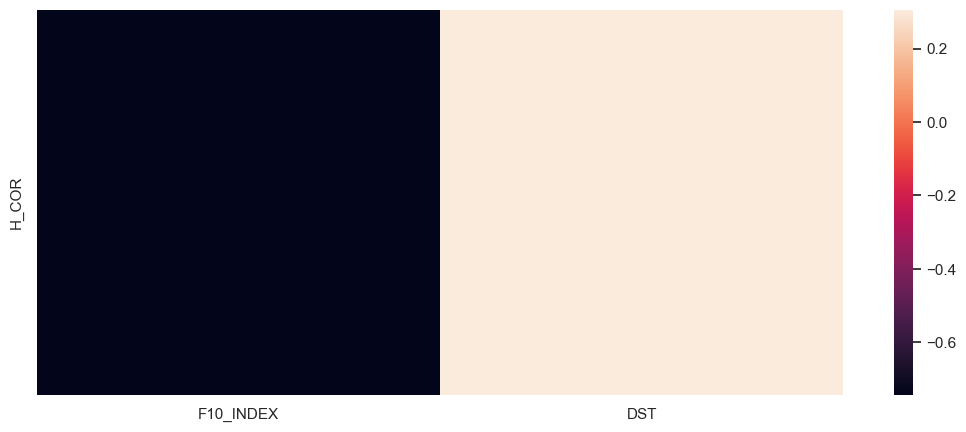

In [ ]:
sn.set(rc = {'figure.figsize':(13,5)})
sn.heatmap(mdfh.corr(method='pearson').iloc[0:1, 1:3])
plt.show()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\1642721989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(mdfh.corr(method='pearson'))


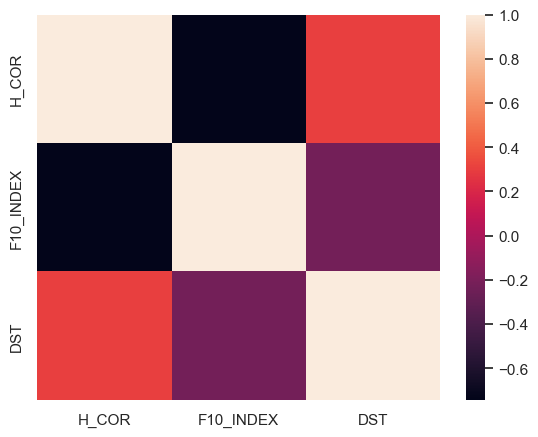

In [ ]:
sn.set(rc = {'figure.figsize':(6.5,5)})
sn.heatmap(mdfh.corr(method='pearson'))
plt.show()

In [ ]:
def polynomial_fit(df_index, df_col, deg):
  '''
  Method to provide least squares polynomial fit of specific column of DF
  :df_index - index of DF
  :df_column - specific column of DF
  : deg - degree of the fitting polynomial
  '''
  x = np.arange(0, len(df_index.values))
  y = df_col.values
  poly_model = np.polyfit(x, y, deg)
  predict = np.poly1d(poly_model)
  return predict(x)

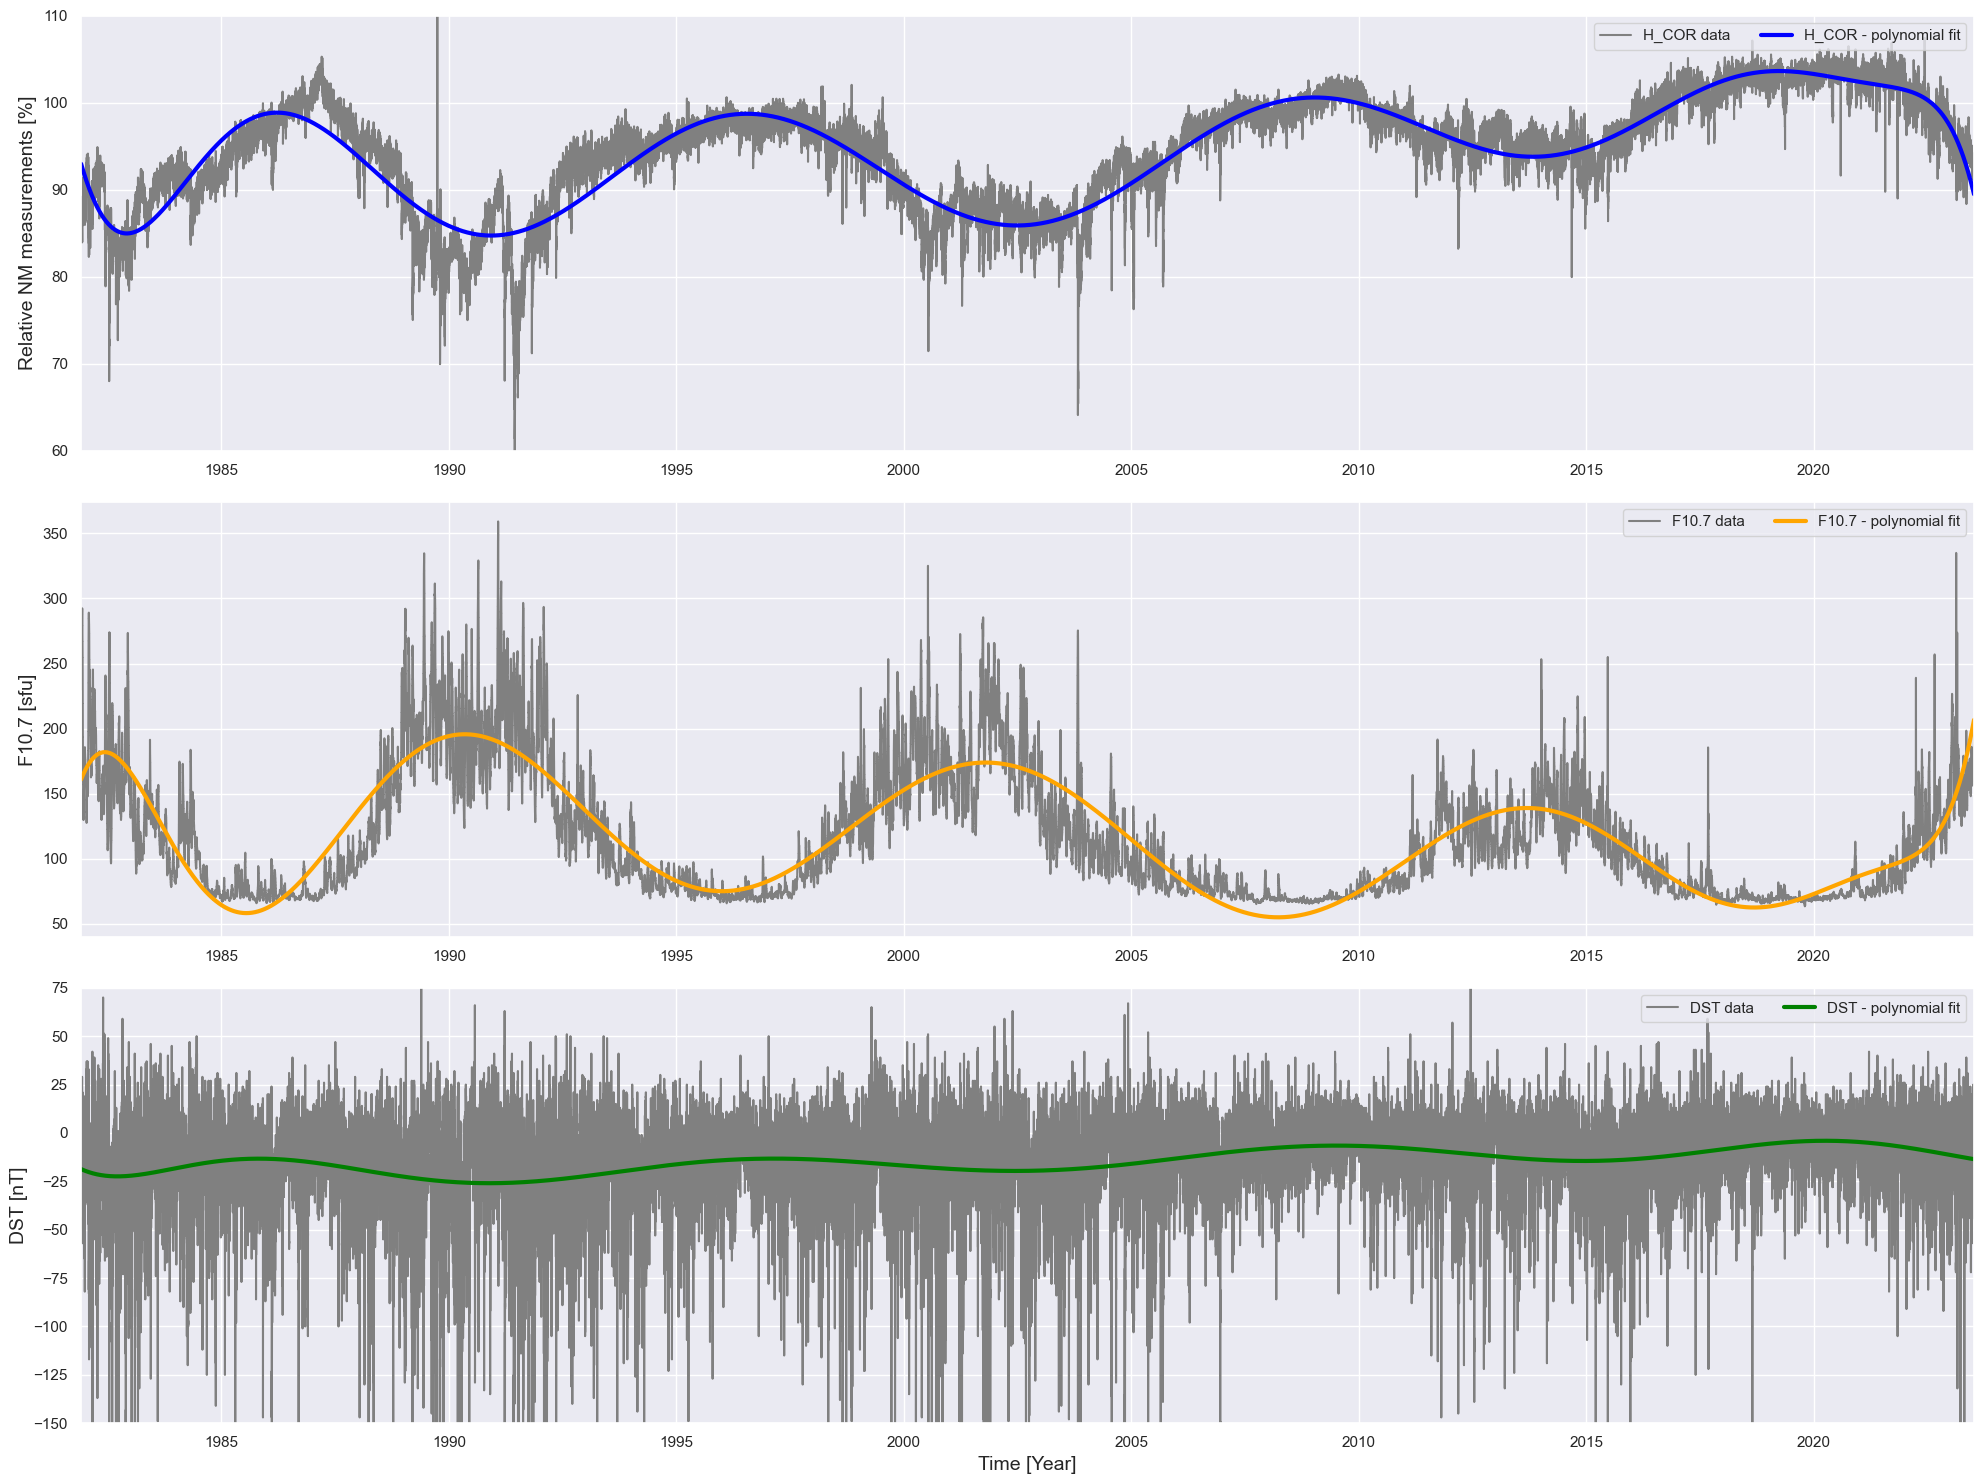

In [ ]:
mdfh['DST'].replace(0, np.NaN, inplace=True)
mdfh.interpolate(method ='linear', limit_direction ='both', inplace=True)

start_year = datetime.datetime.strptime('1981/12/01', "%Y/%m/%d")
end_year = datetime.datetime.strptime('2023/07/10 23:00:00', "%Y/%m/%d %H:%M:%S")

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.ylabel('Relative NM measurements [%]', fontsize=14)
plt.xlim(start_year, end_year)
plt.ylim(60, 110)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.H_COR, color='gray', label='H_COR data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.H_COR, 12),
         color='blue', label='H_COR - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(312)
plt.ylabel('F10.7 [sfu]', fontsize=14)
plt.xlim(start_year, end_year)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.F10_INDEX, color='gray', label='F10.7 data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.F10_INDEX, 12),
         color='orange', label='F10.7 - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(313)
plt.ylabel('DST [nT]', fontsize=14)
plt.xlim(start_year, end_year)
plt.ylim(-150, 75)
ax=plt.gca()
plt.plot(mdfh.index, mdfh.DST, color='gray', label='DST data')
plt.plot(mdfh.index, polynomial_fit(mdfh.index, mdfh.DST, 12),
         color='green', label='DST - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.xlabel('Time [Year]', fontsize=14)
plt.tight_layout()
plt.show()

## Different approach to DST data

In [ ]:
tmdfh = mdfh[mdfh.DST <= -50]
tmdfh.describe()

,H_COR,F10_INDEX,DST
count,20343.000000,20343.000000,20343.000000
mean,88.677471,153.400528,-76.135427
std,6.962269,57.623230,34.603790
min,59.889000,65.800003,-589.000000
25%,83.870000,103.599998,-83.000000
50%,88.572000,147.199997,-65.000000
75%,94.345182,194.300003,-55.000000
max,107.122125,334.700012,-50.000000


C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\1615449047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(tmdfh.corr(method='pearson').iloc[0:1, 1:3])


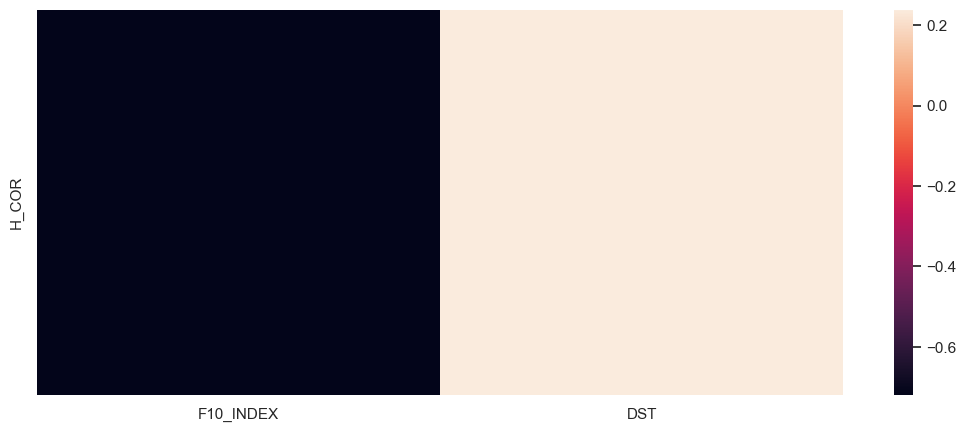

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_10572\1615449047.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmdfh.corr(method='pearson')


,H_COR,F10_INDEX,DST
H_COR,1.000000,-0.718922,0.238679
F10_INDEX,-0.718922,1.000000,-0.185839
DST,0.238679,-0.185839,1.000000


In [ ]:
sn.set(rc = {'figure.figsize':(13,5)})
sn.heatmap(tmdfh.corr(method='pearson').iloc[0:1, 1:3])
plt.show()

tmdfh.corr(method='pearson')

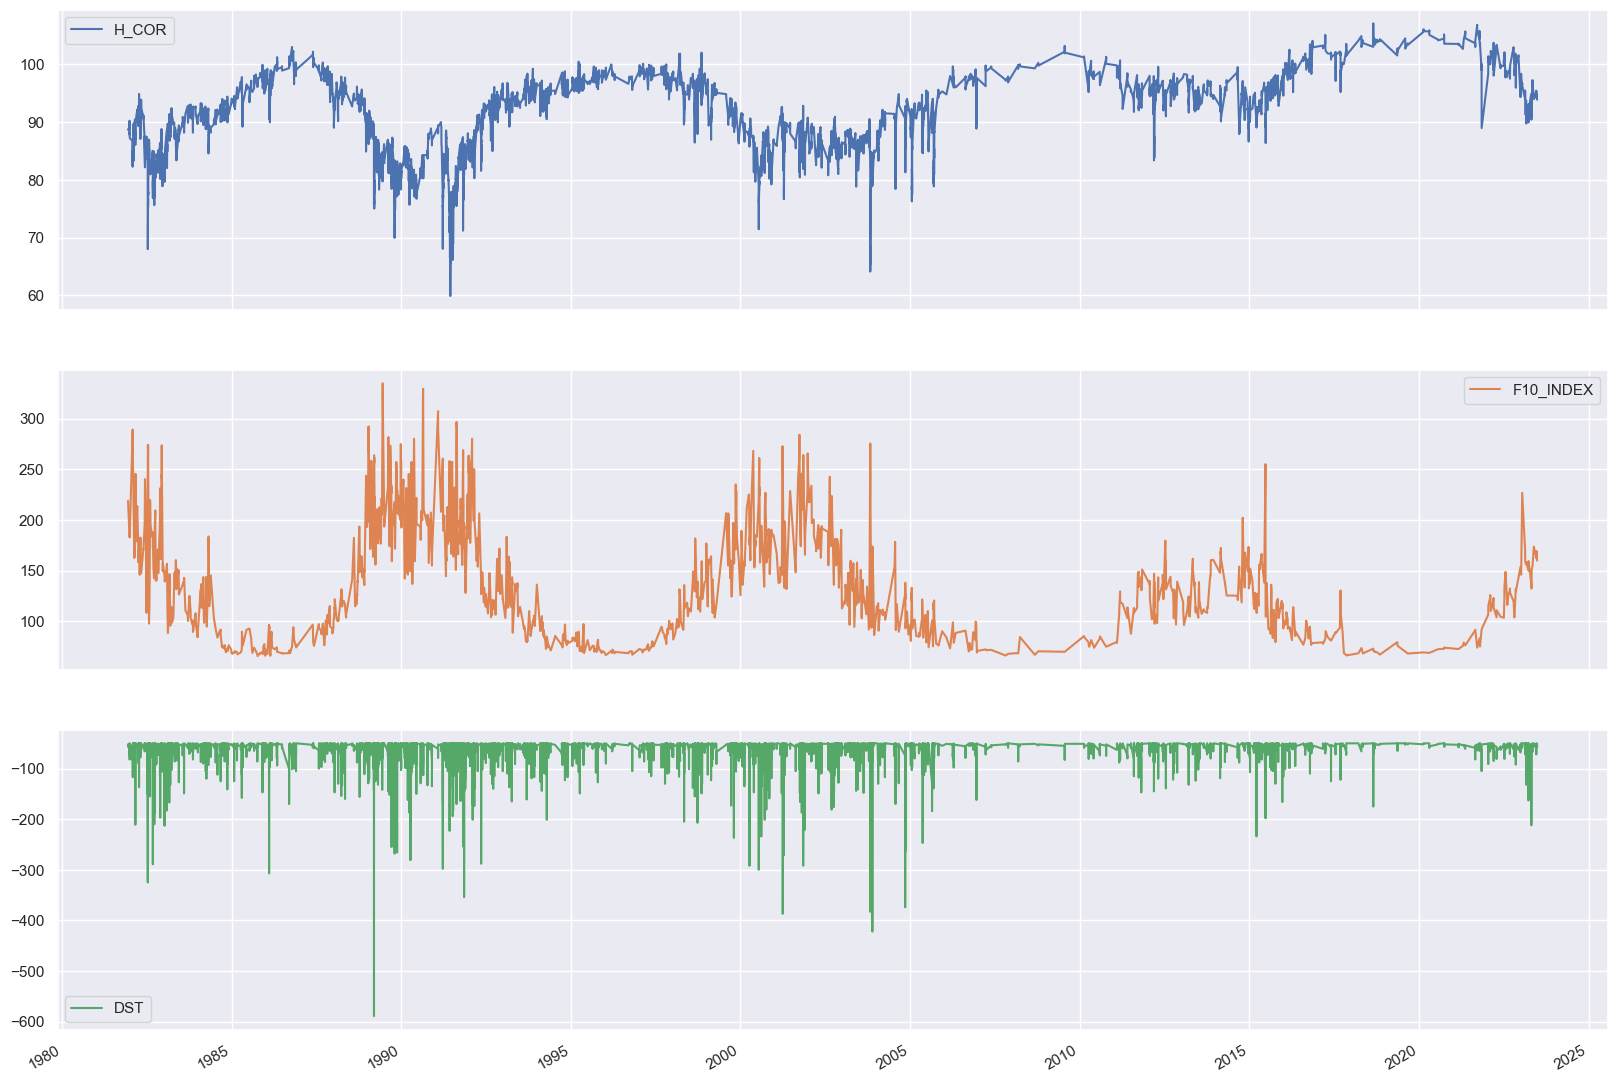

In [ ]:
tmdfh.plot(subplots=True, figsize=(20,15))
plt.show()

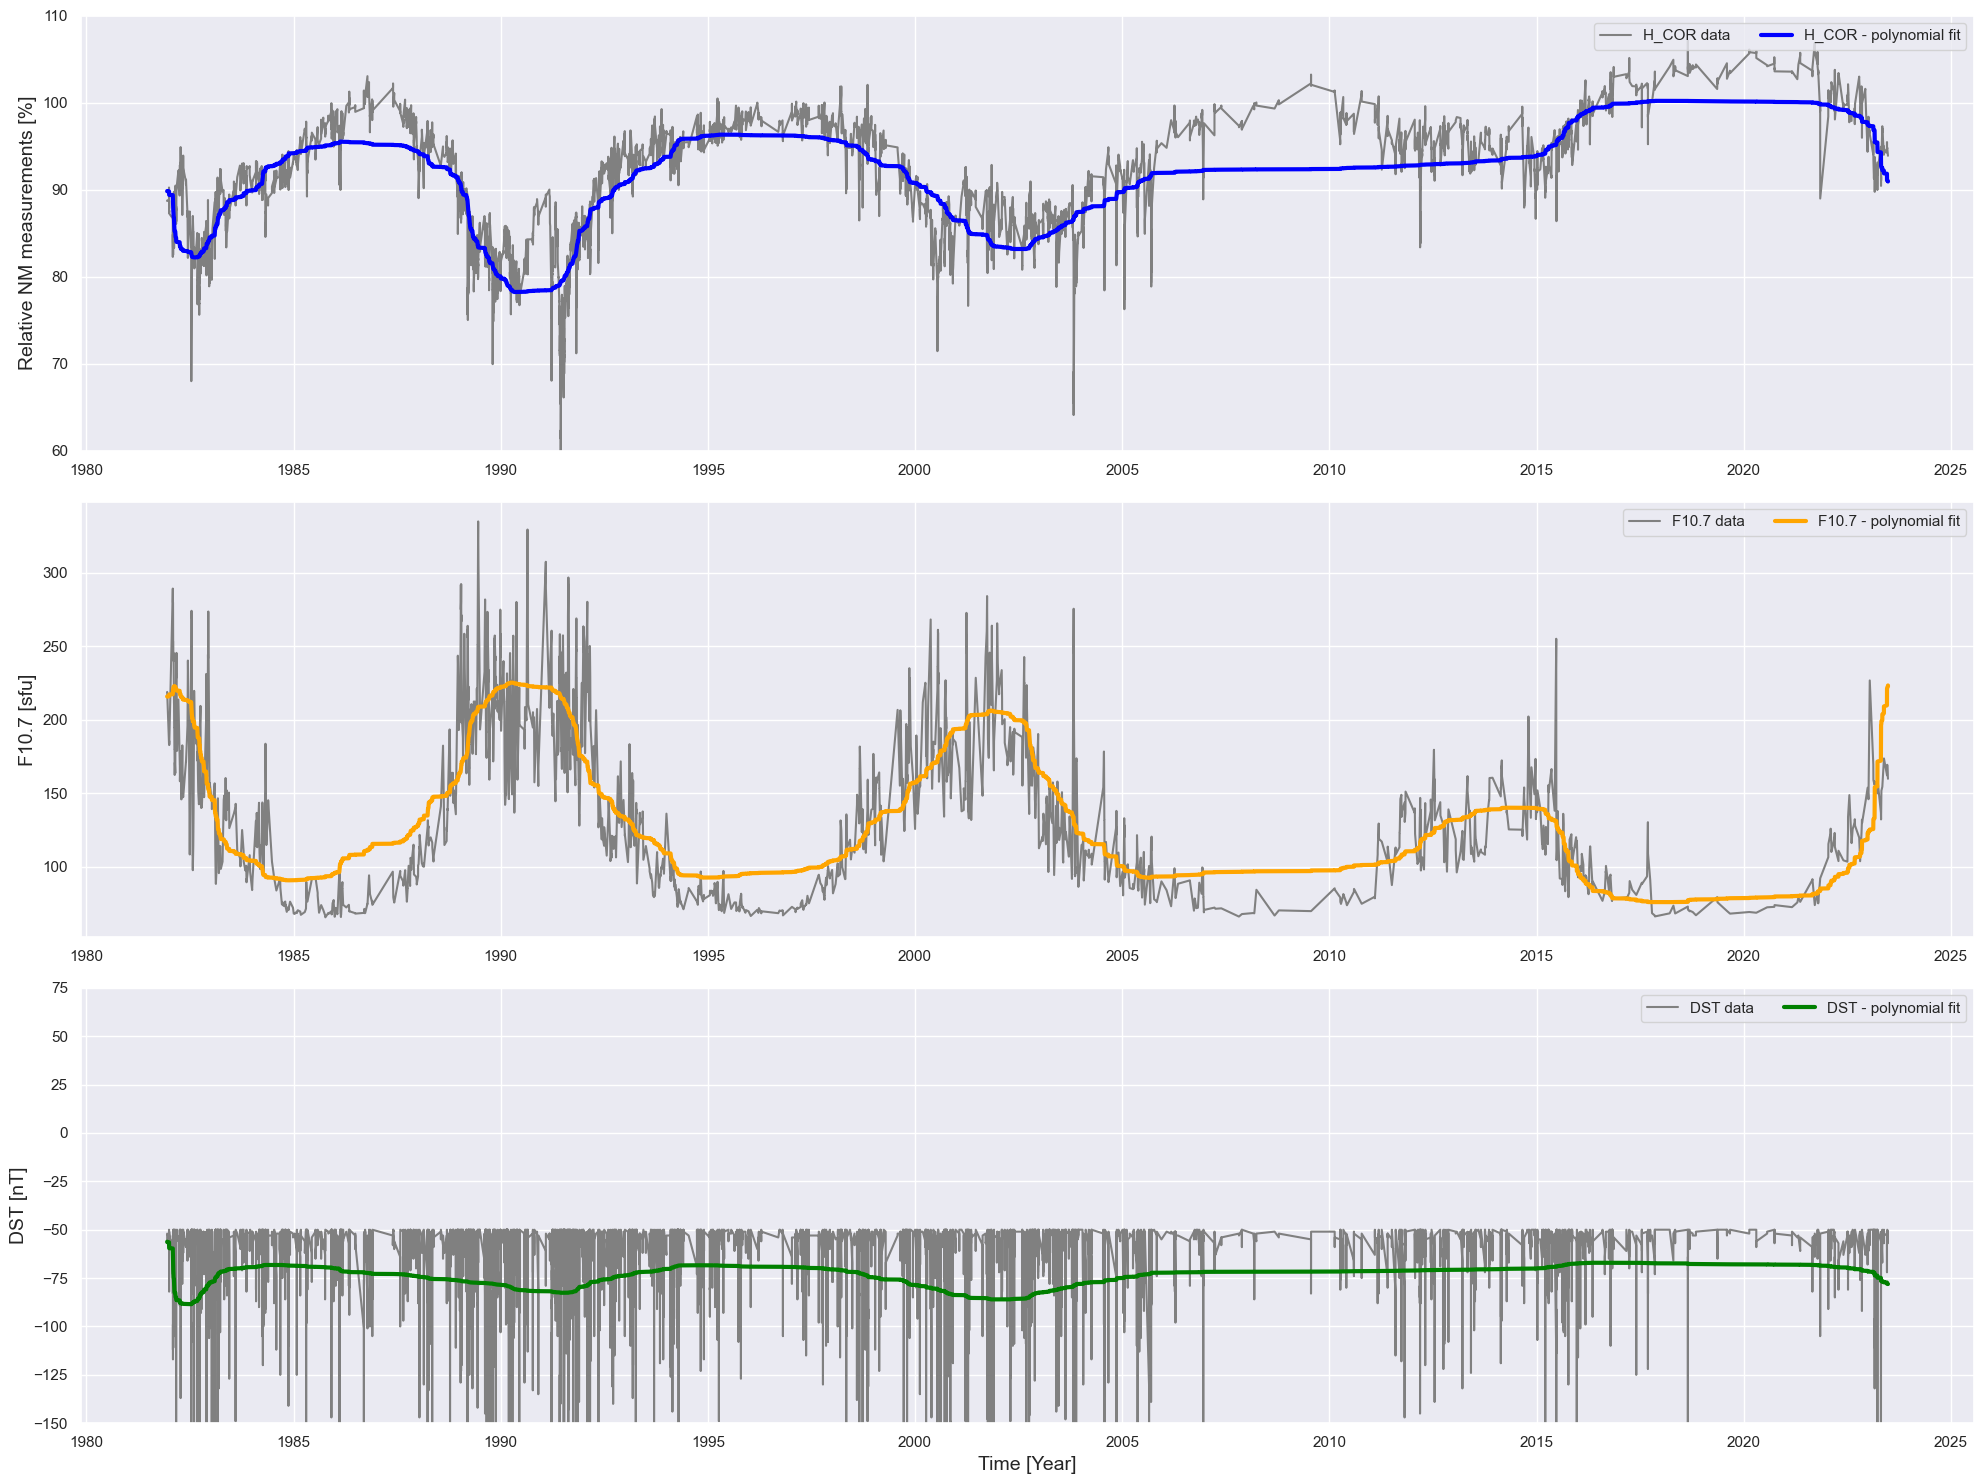

In [ ]:
mdfh['DST'].replace(0, np.NaN, inplace=True)
mdfh.interpolate(method ='linear', limit_direction ='both', inplace=True)

plt.figure(figsize=(20, 15))
plt.subplot(311)
plt.ylabel('Relative NM measurements [%]', fontsize=14)
plt.ylim(60, 110)
ax=plt.gca()
plt.plot(tmdfh.index, tmdfh.H_COR, color='gray', label='H_COR data')
plt.plot(tmdfh.index, polynomial_fit(tmdfh.index, tmdfh.H_COR, 12),
         color='blue', label='H_COR - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(312)
plt.ylabel('F10.7 [sfu]', fontsize=14)
ax=plt.gca()
plt.plot(tmdfh.index, tmdfh.F10_INDEX, color='gray', label='F10.7 data')
plt.plot(tmdfh.index, polynomial_fit(tmdfh.index, tmdfh.F10_INDEX, 12),
         color='orange', label='F10.7 - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.subplot(313)
plt.ylabel('DST [nT]', fontsize=14)
plt.ylim(-150, 75)
ax=plt.gca()
plt.plot(tmdfh.index, tmdfh.DST, color='gray', label='DST data')
plt.plot(tmdfh.index, polynomial_fit(tmdfh.index, tmdfh.DST, 12),
         color='green', label='DST - polynomial fit', linewidth=3)
plt.legend(loc='upper right', ncol=2)
plt.xlabel('Time [Year]', fontsize=14)
plt.tight_layout()
plt.show()

## Test of day-night variations

In [ ]:
dndf = mdfh.drop(["w"], axis=1)

In [ ]:
dndf.to_numpy()
dndf.shape

(364728, 3)

In [ ]:
np_list = np.split(dndf, 15197)

np_list = np.array(np_list)

np_list[0]

array([[ 87.268     , 230.69999695,   4.        ],
       [ 86.924     , 230.69999695,   5.        ],
       [ 86.867     , 230.69999695,   6.        ],
       [ 86.408     , 230.69999695,   7.        ],
       [ 86.523     , 230.69999695,   8.        ],
       [ 86.924     , 230.69999695,  13.        ],
       [ 86.752     , 230.69999695,  15.        ],
       [ 86.981     , 230.69999695,  16.        ],
       [ 87.039     , 230.69999695,  16.        ],
       [ 87.096     , 230.69999695,  11.        ],
       [ 87.096     , 230.69999695,   7.        ],
       [ 87.096     , 230.69999695,  12.        ],
       [ 87.898     , 230.69999695,  15.        ],
       [ 88.07      , 230.69999695,  12.        ],
       [ 88.299     , 230.69999695,   7.        ],
       [ 88.013     , 230.69999695,   9.        ],
       [ 88.07      , 230.69999695,   6.        ],
       [ 88.013     , 230.69999695,   2.5       ],
       [ 88.185     , 230.69999695,  -1.        ],
       [ 88.357     , 230.69999

In [ ]:
dndf = sum(np_list) / 15197
dndf

array([[ 94.25565518, 114.82508879, -14.77938738],
       [ 94.24378921, 114.82510582, -14.64882817],
       [ 94.24949311, 114.82512285, -14.50388344],
       [ 94.27473291, 114.82513988, -14.61676811],
       [ 94.31420064, 114.82515691, -14.87657871],
       [ 94.36282459, 114.82517394, -15.00973469],
       [ 94.43784563, 114.82519097, -15.01992342],
       [ 94.51896551, 114.825208  , -15.01565425],
       [ 94.59794287, 114.82522503, -14.81300272],
       [ 94.66369509, 114.82524206, -14.45052908],
       [ 94.72323812, 114.82525909, -14.13417983],
       [ 94.76898496, 114.82527612, -13.67268681],
       [ 94.7994817 , 114.82529315, -13.46812027],
       [ 94.79197229, 114.82531018, -13.47857394],
       [ 94.75682752, 114.82532721, -13.64522728],
       [ 94.7101803 , 114.82534424, -13.99543864],
       [ 94.65921971, 114.82536127, -14.36117169],
       [ 94.6021337 , 114.8253783 , -14.526501  ],
       [ 94.54516598, 114.82539533, -14.6878701 ],
       [ 94.48366149, 114.82541

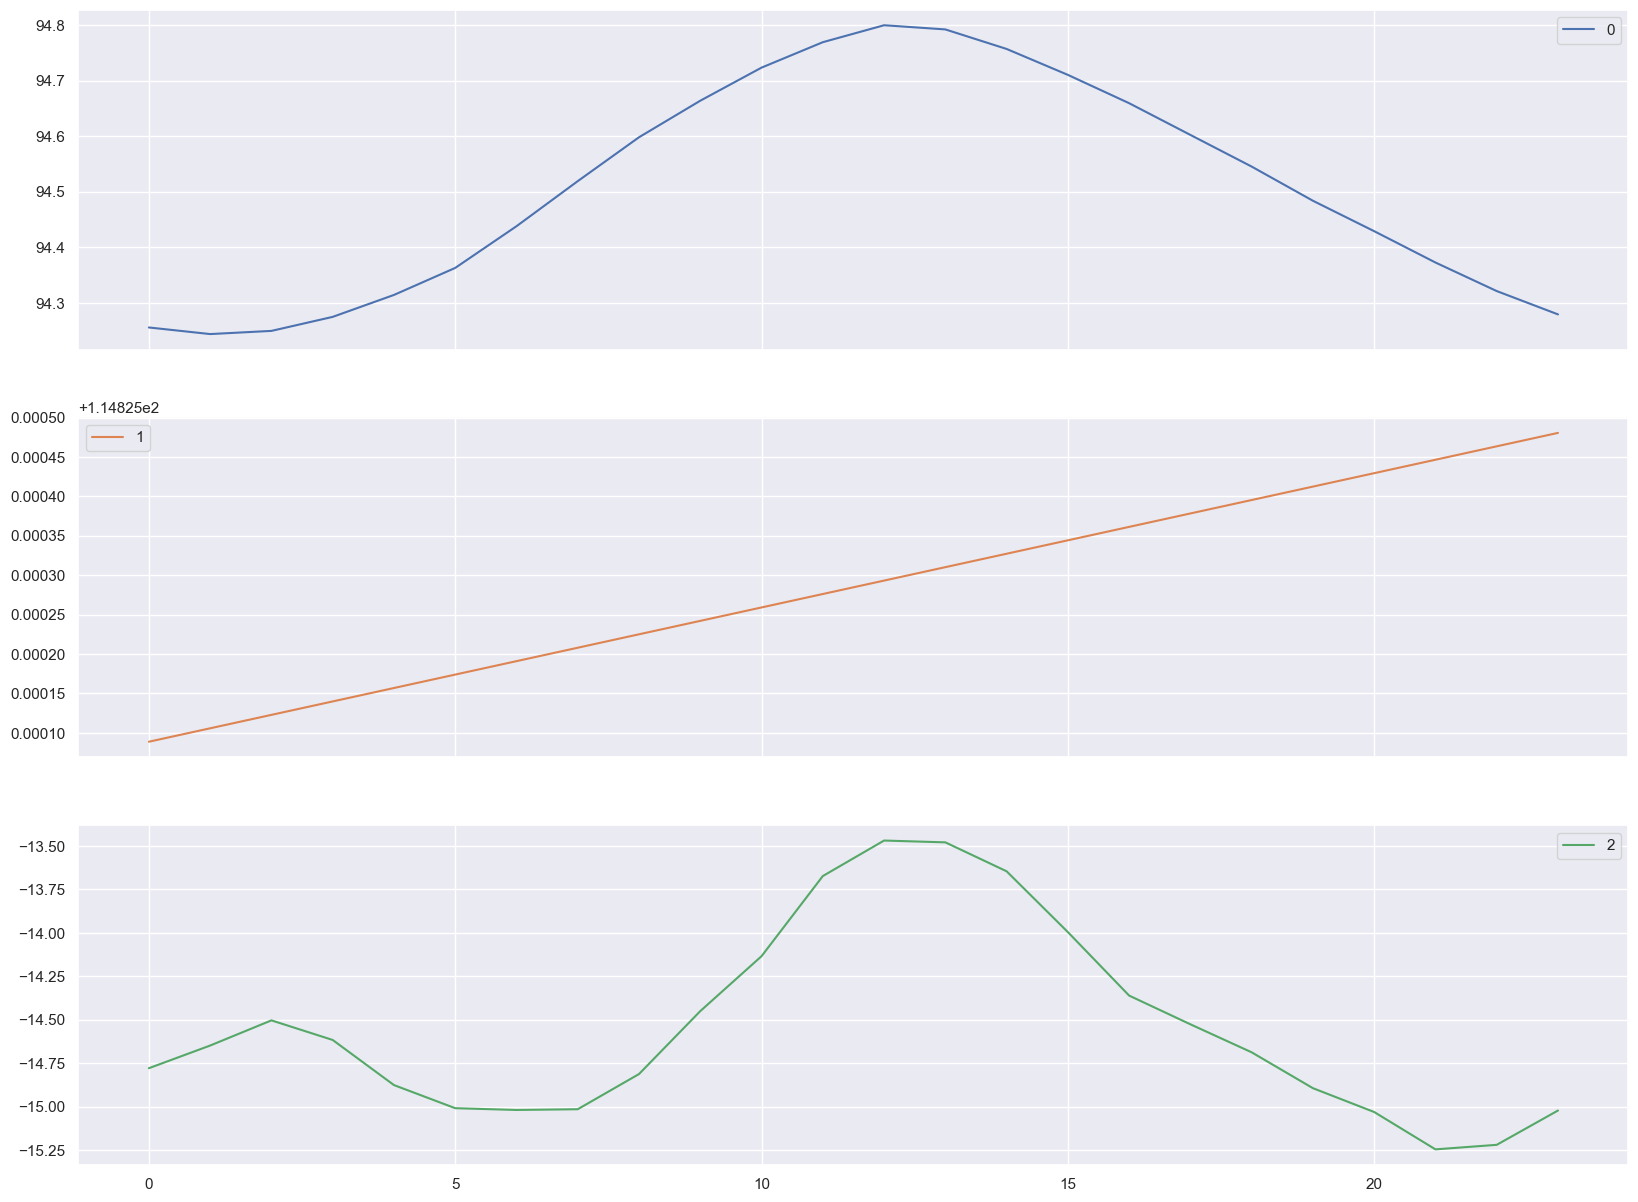

In [ ]:
dndf = pd.DataFrame.from_records(dndf)

dndf.plot(subplots=True, figsize=(20,15))
plt.show()

# Correlation of periods

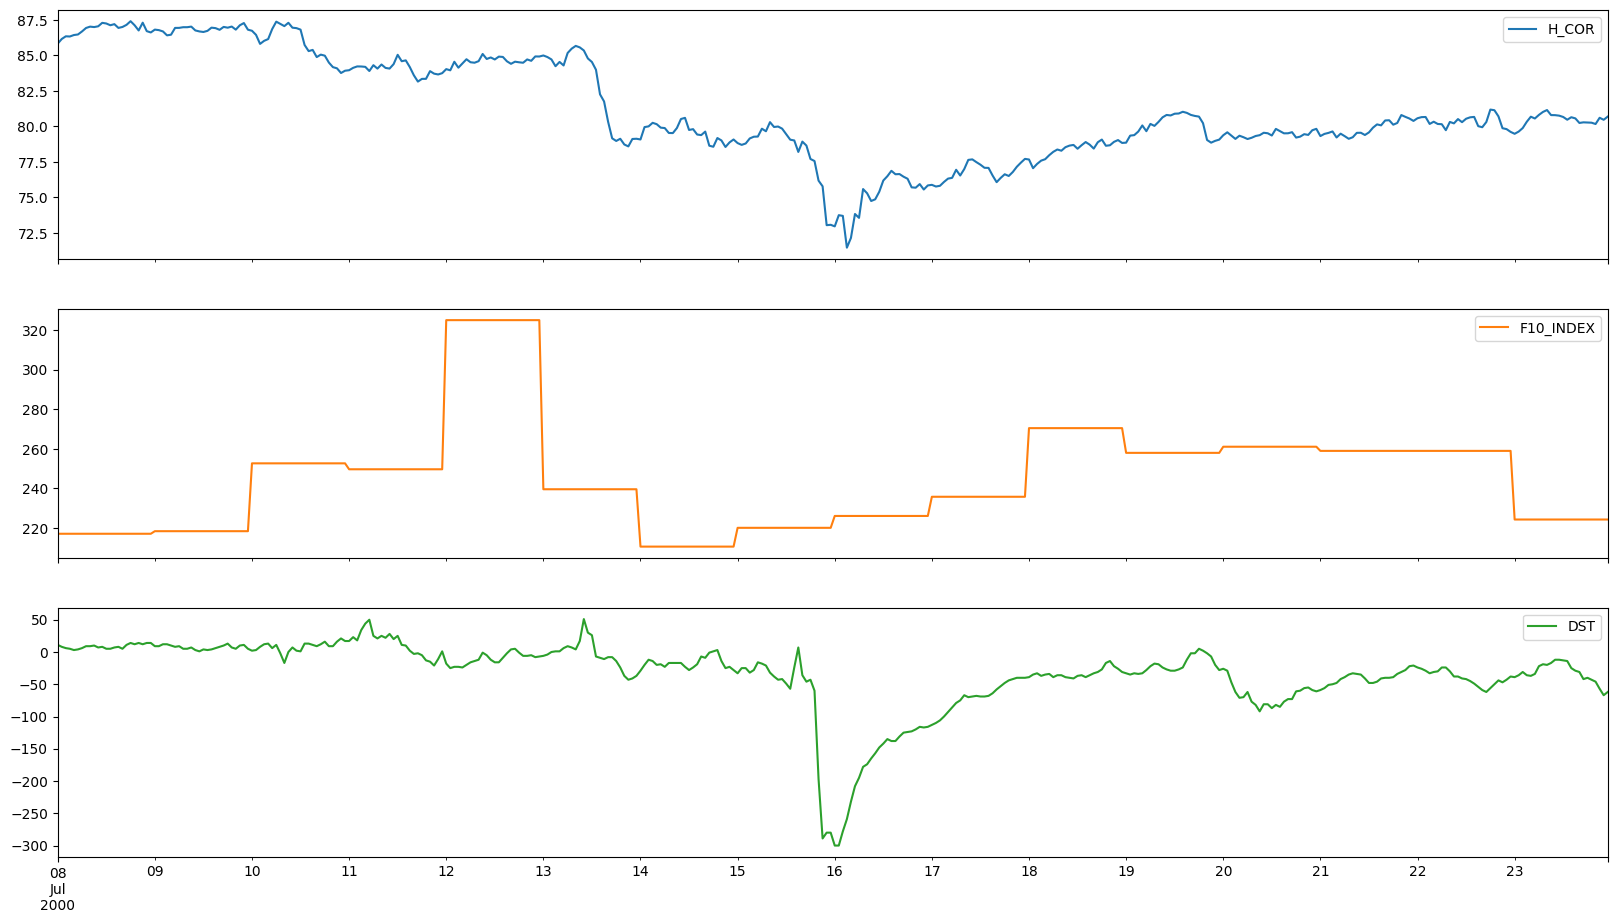

In [43]:
mdfh.loc["2000-07-08": "2000-07-23"].plot(subplots=True, figsize=(20,11))
plt.show()

In [95]:
events = [["2017-06-07", "2017-06-14"], ["2022-06-06", "2022-06-13"]]
edf = pd.DataFrame()

for event in events:
    edf = pd.concat([edf, mdfh[event[0] : event[1]]])

edf

,H_COR,w,F10_INDEX,DST
2017-06-07 00:00:00,101.392914,,77.800003,0
2017-06-07 01:00:00,101.538609,,77.800003,-2
2017-06-07 02:00:00,102.087297,,77.800003,-4
2017-06-07 03:00:00,102.235727,,77.800003,-6
2017-06-07 04:00:00,102.052081,,77.800003,-1
...,...,...,...,...
2022-06-13 19:00:00,100.189584,,135.600006,3
2022-06-13 20:00:00,99.947247,,135.600006,3
2022-06-13 21:00:00,100.294547,,135.600006,2
2022-06-13 22:00:00,100.514650,,135.600006,0


In [96]:
edf.corr(method='pearson')
# fds ["1991-03-21", "1991-03-27"], ["1991-10-25", "1991-10-31"], ["1998-11-05", "1998-11-11"], ["2000-07-13", "2000-07-19"], ["2003-10-26", "2003-11-01"]
# [["1991-03-22", "1991-03-26"], ["1991-10-26", "1991-10-30"], ["1998-11-04", "1998-11-08"], ["2000-07-12", "2000-07-16"], ["2003-10-26", "2003-10-30"]] best corr
# gles [["1989-09-29", "1989-09-30"], ["2005-05-20", "2005-05-21"], ["2022-06-09", "2022-06-10"]]
# [["1989-09-26", "1989-10-3"], ["2005-05-17", "2005-05-24"], ["2022-06-06", "2022-06-13"]]
# tges [["2017-06-10", "2017-06-11"], ["2022-06-09", "2022-06-10"]]
# [["2017-06-07", "2017-06-14"], ["2022-06-06", "2022-06-13"]]

<ipython-input-96-1ef45e85816a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edf.corr(method='pearson')


,H_COR,F10_INDEX,DST
H_COR,1.000000,-0.532773,-0.123863
F10_INDEX,-0.532773,1.000000,0.247791
DST,-0.123863,0.247791,1.000000


In [ ]:
# sn.set(rc = {'figure.figsize':(13,5)})
# sn.heatmap(edf.corr(method='pearson').iloc[0:1, 1:3])
# plt.show()